In [1]:
print("Hello, World!")

Hello, World!


In [2]:
#1. core python basics
nums = [10, 20, 30, 40, 50]
total = 0 
for x in nums: 
    total += x
print(total)



150


In [4]:
#2. strings and parsings 
name, qty = "BTC", 2
print(f"I have {qty} pcs of {name}")
print("I have {} pcs of {}".format(qty, name))

trade = "BUY 2 BTC @ 35000"
parts = trade.split(" ") # ["BUY", "2", "BTC", "@", "35000"]

side = parts[0]
qty = int(parts[1])
symbol = parts[2]
price = float(parts[4])

print(f"side={side}, qty={qty}, symbol={symbol}, price={price}")


I have 2 pcs of BTC
I have 2 pcs of BTC
side=BUY, qty=2, symbol=BTC, price=35000.0


In [5]:
#functions 

def pnl(side, buy_price, sell_price, qty): 
    if side == "BUY":
        return (sell_price - buy_price) * qty 
    else: #side == "SELL"
        return (buy_price - sell_price) * qty

In [ ]:
#lists, dictionaries, tuples 
trades = [ "BUY 2 BTC @ 35000", "SELL 1 BTC @ 36000", "BUY 3 ETH @ 2000"
]
positions = []

for t in trades: 
    parts = t.split(" ")
    side, qty, symbol, price = parts[0], float(parts[1]), parts[2], float(parts[4])
    positions.append( (side, qty, symbol, price) )

print(positions)
# [('BUY', 2.0, 'BTC', 35000.0), ('SELL', 1.0, 'BTC', 36000.0), ('BUY', 3.0, 'ETH', 2000.0)]


In [ ]:
#pandas 
import pandas as pd
#df = pd.read_csv("trades.csv") for importing csv file
#df.head(), df.info() for heading and info
#df["price"], df.loc[0, "price"] for accessing column and row
#df[df["price"] > 10000] for filtering
#df.groupby("symbol")["qty"].sum() for grouping and aggregating


#calculate VWAP
#df["notional"] = df["qty"] * df["price"] for creating new column
#vwap = df["notional"].sum() / df["qty"].sum()
#print(vwap)



# 📑 Flowdesk Trader Intern — Technical Test (Practice)

---

## 🐍 Part 1 — Python Strings & P&L (⏱ 25 min)

You are given a list of trade strings:

```python
trades = [
    "BUY BTC 2 @ 35000 fee=10",
    "SELL BTC 1 @ 36000 fee=5",
    "SELL BTC 1 @ 36500 fee=5"
]
```

You are given a list of trade strings:

trades = [
    "BUY BTC 2 @ 35000 fee=10",
    "SELL BTC 1 @ 36000 fee=5",
    "SELL BTC 1 @ 36500 fee=5"
]

✅ Tasks
🔎 Parse each string into: side (BUY/SELL), asset, size, price, fee
🗂 Store parsed trades in a structured list/dict.
🧮 Write a function to calculate per-trade P&L and total P&L.

## 🐼 Part 2 — Pandas & CSV Trading History (⏱ 40 min)

You receive a CSV file `trades.csv` with the following columns:

| timestamp           | asset | price  | quantity |
|---------------------|-------|--------|----------|
| 2025-09-18 09:00:00 | BTC   | 35000  | 0.5      |
| 2025-09-18 09:01:00 | BTC   | 35200  | 0.8      |
| 2025-09-18 09:02:00 | ETH   | 2000   | 1.2      |

---

### ✅ Tasks (10 Questions)

1. 📥 Load the CSV into a Pandas DataFrame.  
2. 📝 Show the number of rows and columns in the dataset.  
3. 📊 What is the **average price** of all trades?  
4. 🔢 How many trades are there in total?  
5. 📦 What is the **total traded volume** (sum of `quantity`)?  
6. 📈 Find the **maximum** and **minimum** trade price.  
7. 🪙 Group trades by `asset` and show the total volume for each.  
8. ⚖️ Calculate the **VWAP** (Volume-Weighted Average Price).  
9. 📉 Plot a line graph of `price` vs `timestamp`.  
10. 💾 Save your final DataFrame into `results.csv`.  

---


## Part 3 - SQL (⏱ 15 min)
You have a table `trades` with columns: id, side, asset, size, price, fee, trade_time.
✅ Tasks
🔍 Write a SQL query to calculate total P&L per asset.
✅ Questions

1. 🔎 Write a query to get the total traded volume per asset.

SELECT asset, SUM(size) AS total_volume
FROM trades
GROUP BY asset;


2. 📊 Write a query to find the average price of BTC trades above 30,000.

SELECT AVG(price) AS avg_price
FROM trades
WHERE asset = 'BTC' AND price > 30000;

3. 📅 Write a query to count the number of trades per day.

SELECT DATE(timestamp) AS trade_day, COUNT(*) AS trade_count
FROM trades
GROUP BY trade_day;


4. 📝 Explain in 2–3 sentences what your query in Q1 does.

- It groups all trades by asset type.
- It sums up the trade sizes for each asset.
- The result shows total traded volume per asset.


In [ ]:
# ================== Part 1 — Python Strings & P&L ==================

trades = [
    "BUY BTC 2 @ 35000 fee=10",
    "SELL BTC 1 @ 36000 fee=5",
    "SELL BTC 1 @ 36500 fee=5"
]

# Function to parse trade strings
def parse_trade(trade_str):
    parts = trade_str.replace("fee=", "").split()
    side = parts[0]
    asset = parts[1]
    size = float(parts[2])
    price = float(parts[4])
    fee = float(parts[5])
    return {"side": side, "asset": asset, "size": size, "price": price, "fee": fee}

# Parse all trades
parsed_trades = [parse_trade(t) for t in trades]

# Track positions and P&L
buy_prices = []  # store (price, size) for buys
realized_pnl = 0.0

for t in parsed_trades:
    side, asset, size, price, fee = t["side"], t["asset"], t["size"], t["price"], t["fee"]

    if side == "BUY":
        buy_prices.append((price, size))
        print(f"Executed BUY {size} {asset} @ {price} (fee={fee})")
    else:  # SELL
        qty_to_sell = size
        sell_price = price
        pnl_trade = 0.0

        # FIFO matching against buy positions
        while qty_to_sell > 0 and buy_prices:
            buy_price, buy_qty = buy_prices[0]
            matched_qty = min(qty_to_sell, buy_qty)
            pnl_trade += (sell_price - buy_price) * matched_qty
            qty_to_sell -= matched_qty
            if matched_qty == buy_qty:
                buy_prices.pop(0)  # fully used this lot
            else:
                buy_prices[0] = (buy_price, buy_qty - matched_qty)

        pnl_trade -= fee
        realized_pnl += pnl_trade
        print(f"Executed SELL {size} {asset} @ {sell_price} (fee={fee}) | P&L: {pnl_trade:.2f}")

print("\nTotal Realized P&L:", round(realized_pnl, 2))

# If open positions remain, show unrealized P&L vs last trade price
if buy_prices:
    last_price = parsed_trades[-1]["price"]
    unrealized = sum((last_price - bp) * qty for bp, qty in buy_prices)
    print("Unrealized P&L (vs last price):", round(unrealized, 2))


Q1) Loaded CSV:
            timestamp asset    price  quantity
0 2025-09-18 09:00:00   BTC  35000.0       0.5
1 2025-09-18 09:01:00   BTC  35200.0       0.8
2 2025-09-18 09:02:00   ETH   2000.0       1.2
3 2025-09-18 09:03:00   ETH   2025.0       0.7
4 2025-09-18 09:04:00   BTC  35500.0       0.3 

Q2) Rows: 6, Columns: 4

Q3) Average price: 18619.166667

Q4) Number of trades: 6

Q5) Total traded volume: 5.500000

Q6) Max price: 35500.000000 | Min price: 1990.000000

Q7) Volume by asset:
  asset  total_volume
1   ETH           3.9
0   BTC           1.6 

Q8) VWAP (overall): 11655.909091
VWAP by asset:
  asset          vwap
0   BTC  35193.750000
1   ETH   1999.358974 



C:\Users\Viriya Gunawan Lim\AppData\Local\Temp\ipykernel_35124\2155388292.py:61: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g["notional"].sum() / g["quantity"].sum() if g["quantity"].sum() != 0 else float("nan"))


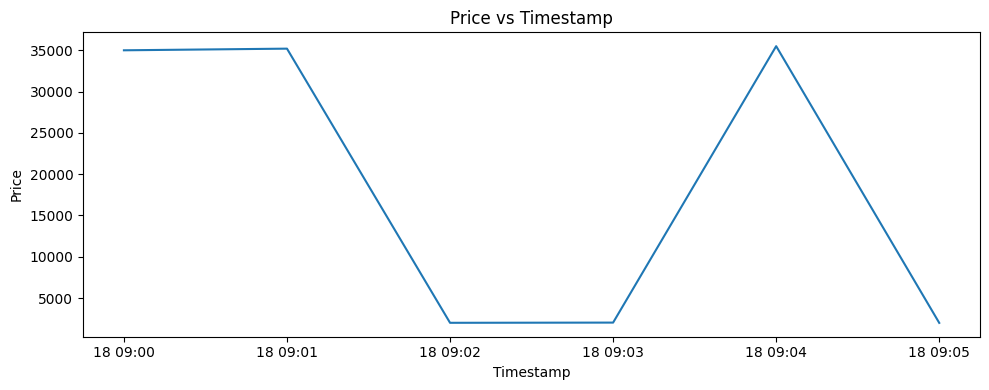

Q9) Saved plot -> price_plot.png

Q10) Saved DataFrame -> results.csv

Summary:
          metric         value
0          rows      6.000000
1          cols      4.000000
2     avg_price  18619.166667
3    num_trades      6.000000
4  total_volume      5.500000
5     max_price  35500.000000
6     min_price   1990.000000
7  vwap_overall  11655.909091
Saved summary -> summary_results.csv


In [2]:
### 🐼 Part 2 — Pandas & CSV Trading History (⏱ 40 min)

#You receive a CSV file `trades.csv` with the columns:

#`timestamp, asset, price, quantity`

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ================== 1) Load the CSV ==================
csv_path = Path("C:\\Users\\Viriya Gunawan Lim\\Downloads\\trades.csv")
df = pd.read_csv(
    csv_path,
    parse_dates=["timestamp"],
    dtype={"asset": "string", "price": "float64", "quantity": "float64"}
)
print("Q1) Loaded CSV:")
print(df.head(), "\n")

# ================== 2) Shape ==================
rows, cols = df.shape
print(f"Q2) Rows: {rows}, Columns: {cols}\n")

# ================== 3) Average price ==================
avg_price = df["price"].mean()
print(f"Q3) Average price: {avg_price:.6f}\n")

# ================== 4) Number of trades ==================
n_trades = len(df)
print(f"Q4) Number of trades: {n_trades}\n")

# ================== 5) Total traded volume ==================
total_volume = df["quantity"].sum()
print(f"Q5) Total traded volume: {total_volume:.6f}\n")

# ================== 6) Max and Min price ==================
max_price = df["price"].max()
min_price = df["price"].min()
print(f"Q6) Max price: {max_price:.6f} | Min price: {min_price:.6f}\n")

# ================== 7) Volume by asset ==================
vol_by_asset = (
    df.groupby("asset", as_index=False)["quantity"]
      .sum()
      .rename(columns={"quantity": "total_volume"})
      .sort_values("total_volume", ascending=False)
)
print("Q7) Volume by asset:")
print(vol_by_asset, "\n")

# ================== 8) VWAP ==================
notional = (df["price"] * df["quantity"]).sum()
denom = df["quantity"].sum()
vwap = notional / denom if denom != 0 else float("nan")
print(f"Q8) VWAP (overall): {vwap:.6f}")

vwap_by_asset = (
    df.assign(notional=df["price"] * df["quantity"])
      .groupby("asset")
      .apply(lambda g: g["notional"].sum() / g["quantity"].sum() if g["quantity"].sum() != 0 else float("nan"))
      .rename("vwap")
      .reset_index()
      .sort_values("vwap", ascending=False)
)
print("VWAP by asset:")
print(vwap_by_asset, "\n")

# ================== 9) Plot price vs timestamp ==================
df_sorted = df.sort_values("timestamp")
plt.figure(figsize=(10, 4))
plt.plot(df_sorted["timestamp"], df_sorted["price"])
plt.title("Price vs Timestamp")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.tight_layout()
plt.savefig("price_plot.png", dpi=200)
plt.show()
print("Q9) Saved plot -> price_plot.png\n")

# ================== 10) Save final DataFrame ==================
df_out = df.copy()
df_out["notional"] = df_out["price"] * df_out["quantity"]
df_out = df_out.sort_values(["asset", "timestamp"])
df_out.to_csv("results.csv", index=False)
print("Q10) Saved DataFrame -> results.csv\n")

# (Optional summary)
summary = pd.DataFrame(
    {
        "metric": [
            "rows", "cols",
            "avg_price", "num_trades",
            "total_volume", "max_price", "min_price",
            "vwap_overall"
        ],
        "value": [
            rows, cols,
            avg_price, n_trades,
            total_volume, max_price, min_price,
            vwap
        ]
    }
)
print("Summary:\n", summary)
summary.to_csv("summary_results.csv", index=False)
print("Saved summary -> summary_results.csv")


In [ ]:
#THIS IS STILL PYTHON 

# ================== Part 3 — SQL Basics (single cell) ==================
# Requirements: a CSV named 'trades.csv' with columns:
# timestamp (ISO string), asset (str), price (float), size/quantity (float).
# If your CSV uses 'quantity' instead of 'size', set CSV_SIZE_COL = "quantity".

import sqlite3, pandas as pd
from pathlib import Path

CSV_PATH = Path("trades.csv")
CSV_SIZE_COL = "quantity"   # change to "size" if your file uses that header

if not CSV_PATH.exists():
    raise FileNotFoundError("trades.csv not found. Place it in the working directory.")

# Load CSV with pandas
df = pd.read_csv(CSV_PATH, dtype={"asset": "string"})
# Normalize column names expected by SQL table
df = df.rename(columns={CSV_SIZE_COL: "size"})
# Ensure required columns exist
required_cols = {"timestamp", "asset", "price", "size"}
missing = required_cols - set(map(str.lower, df.columns.str.lower()))
if missing:
    raise ValueError(f"CSV missing required columns: {missing}")

# Create SQLite in-memory DB and table
con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("""
    CREATE TABLE trades(
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        timestamp TEXT,
        asset TEXT,
        price REAL,
        size REAL
    );
""")

# Insert data
df[["timestamp", "asset", "price", "size"]].to_sql("trades", con, if_exists="append", index=False)

# Helper to run a query and show as DataFrame
def run(query, params=None):
    params = params or {}
    out = pd.read_sql_query(query, con, params=params)
    print(query.strip(), "\n")
    display(out)
    print("-" * 60, "\n")
    return out

print("✅ Loaded CSV into SQLite. Row count:", pd.read_sql_query("SELECT COUNT(*) AS n FROM trades;", con)["n"][0], "\n")

# Q1) Total traded volume per asset
q1 = """
SELECT asset,
       SUM(size) AS total_volume
FROM trades
GROUP BY asset
ORDER BY total_volume DESC;
"""
res1 = run(q1)

# Q2) Average price of BTC trades above 30,000
q2 = """
SELECT AVG(price) AS avg_price_over_30k
FROM trades
WHERE asset = :asset AND price > :pmin;
"""
res2 = run(q2, params={"asset": "BTC", "pmin": 30000})

# Q3) Number of trades per day
# Works if timestamp is ISO-8601 (YYYY-MM-DD HH:MM:SS). DATE() extracts date part in SQLite.
q3 = """
SELECT DATE(timestamp) AS trade_day,
       COUNT(*)        AS trade_count
FROM trades
GROUP BY trade_day
ORDER BY trade_day;
"""
res3 = run(q3)

# Q4) Short explanation for Q1
explanation_q1 = (
    "Q1 Explanation: We GROUP BY asset to aggregate rows per asset; "
    "then SUM(size) computes total traded volume for each asset. "
    "ORDER BY total_volume DESC sorts assets from the largest volume to the smallest."
)
print(explanation_q1)

# Clean up (optional)
# con.close()


### THIS IS ON SQL 
-- ================== Part 3 — SQL Basics ==================

-- Q1) 🔎 Total traded volume per asset
SELECT asset, SUM(size) AS total_volume
FROM trades
GROUP BY asset
ORDER BY total_volume DESC;

-- Q2) 📊 Average price of BTC trades above 30,000
SELECT AVG(price) AS avg_price_over_30k
FROM trades
WHERE asset = 'BTC'
  AND price > 30000;

-- Q3) 📅 Number of trades per day
SELECT DATE(timestamp) AS trade_day,
       COUNT(*)        AS trade_count
FROM trades
GROUP BY DATE(timestamp)
ORDER BY trade_day;

-- Q4) 📝 Explanation (write in plain text, not executable SQL):
-- This query groups all trades by asset (GROUP BY asset).
-- Then, SUM(size) calculates the total traded volume for each asset.
-- ORDER BY total_volume DESC sorts the output from the largest volume to the smallest.